In [1]:
import pandas  as pd
import os
import  re
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt


DMCfile="/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/DMC_based/BL14/BL14_CD4Neu_in_out_DMC/BL14_all_matrixCin_nr0.4_imputed_g1_CD4_3_g2_others_33_DMC.txt"




tentativefraglength=220
diffcut=-.8


outfile=DMCfile+"_diff_"+str(diffcut)+".txt"



DMCdf=pd.read_csv(DMCfile,sep="\t",header=None)
DMCdf.head()

,0,1,2,3,4,5,6,7,8,9
0,chr1,101831,101832,0.30833,0.159758,1,0.020445,.,0.97767,0.81791
1,chr1,102933,102934,0.31793,0.119212,1,0.042165,.,0.96833,0.84912
2,chr1,109176,109177,0.49689,0.115515,1,0.218480,.,0.85567,0.74015
3,chr1,127750,127751,0.30833,0.196773,1,0.036696,.,0.97333,0.77656
4,chr1,129631,129632,0.30833,-0.187333,1,0.036696,.,0.72100,0.90833


In [2]:
m = re.search('g1_(.+?)_\d+_g2', os.path.basename(DMCfile))
if m:
    found = m.group(1)

else:
    print("cell type not found", os.path.basename(DMCfile))
    print("exiting")

    sys.exit(1)

celltype = found


DMCdf.rename(columns={0:'chrom',1:'start',2:'end',3:'q',4:'diff',5:'#cpg',6:'p(MWU)',7:'p(2dks)',8:celltype,9:'others'},inplace=True,errors='raise')

DMCdf.head()

,chrom,start,end,q,diff,#cpg,p(MWU),p(2dks),CD4,others
0,chr1,101831,101832,0.30833,0.159758,1,0.020445,.,0.97767,0.81791
1,chr1,102933,102934,0.31793,0.119212,1,0.042165,.,0.96833,0.84912
2,chr1,109176,109177,0.49689,0.115515,1,0.218480,.,0.85567,0.74015
3,chr1,127750,127751,0.30833,0.196773,1,0.036696,.,0.97333,0.77656
4,chr1,129631,129632,0.30833,-0.187333,1,0.036696,.,0.72100,0.90833


In [3]:
print(DMCdf['diff'].min())

-0.860848


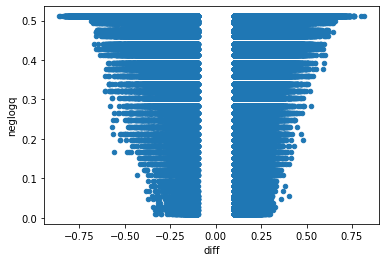

In [4]:
DMCdf['neglogq']=-np.log10(DMCdf['q'])

DMCdf.plot.scatter(x='diff',y='neglogq')

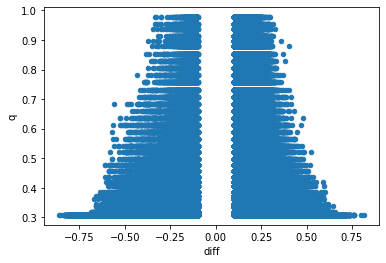

In [5]:
DMCdf.plot.scatter(x='diff',y='q')

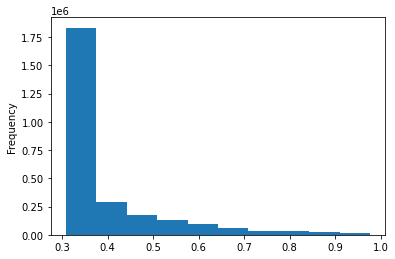

In [6]:
DMCdf['q'].plot.hist()

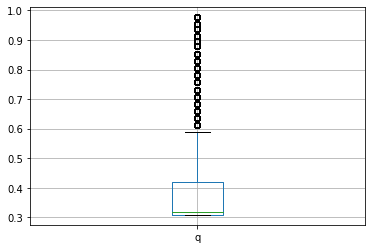

In [7]:
boxplot = DMCdf.boxplot(column=['q'])

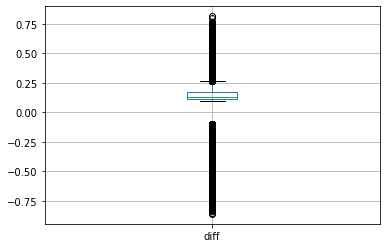

In [8]:
boxplot = DMCdf.boxplot(column=['diff'])

In [9]:

DMCdfdiffcut=DMCdf[DMCdf['diff']<=diffcut]
DMCdfdiffcut.shape

(51, 11)

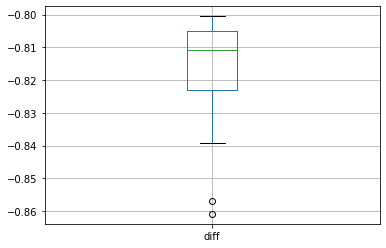

In [10]:
DMCdfdiffcut.boxplot(column=['diff'])

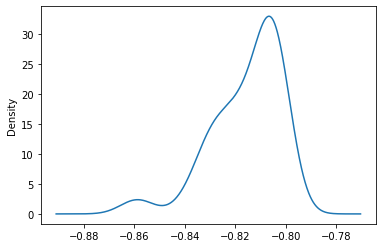

In [11]:
DMCdfdiffcut['diff'].plot.kde()

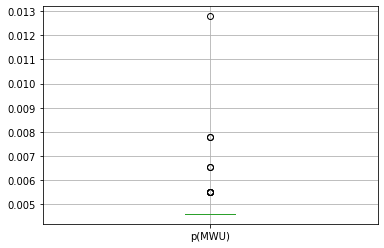

In [12]:
DMCdfdiffcut.boxplot(column=['p(MWU)'])

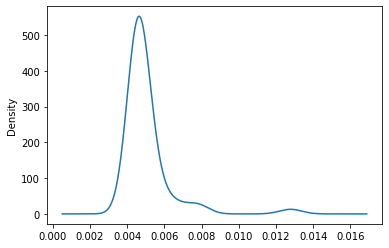

In [13]:
DMCdfdiffcut['p(MWU)'].plot.kde()

In [14]:
##### distance measurement######

DMCdfdiffcut.head()

,chrom,start,end,q,diff,#cpg,p(MWU),p(2dks),CD4,others,neglogq
24900,chr1,11285090,11285091,0.30833,-0.804045,1,0.004608,.,0.007667,0.81171,0.510984
49637,chr1,25621662,25621663,0.30833,-0.803515,1,0.004608,.,0.049667,0.85318,0.510984
209530,chr1,239718341,239718342,0.30833,-0.818515,1,0.004608,.,0.025667,0.84418,0.510984
228568,chr10,6595577,6595578,0.30833,-0.817818,1,0.004608,.,0.000000,0.81782,0.510984
326431,chr10,114522827,114522828,0.30833,-0.839212,1,0.004608,.,0.027667,0.86688,0.510984


In [15]:
DMCdfdiffcut['p(MWU)'].max()

0.012782

In [16]:
DMCdfdiffcut=DMCdfdiffcut.sort_values(by=['start'])
DMCdfdiffcut.head()

,chrom,start,end,q,diff,#cpg,p(MWU),p(2dks),CD4,others,neglogq
1143973,chr19,1072194,1072195,0.30833,-0.821773,1,0.004608,.,0.029500,0.85127,0.510984
1450623,chr20,6030667,6030668,0.30833,-0.800485,1,0.004608,.,0.028667,0.82915,0.510984
228568,chr10,6595577,6595578,0.30833,-0.817818,1,0.004608,.,0.000000,0.81782,0.510984
503995,chr12,6791009,6791010,0.30833,-0.830000,1,0.012782,.,0.000000,0.83000,0.510984
24900,chr1,11285090,11285091,0.30833,-0.804045,1,0.004608,.,0.007667,0.81171,0.510984


In [17]:
DMCdfdiffcut_linkageGroupINFO=DMCdfdiffcut.copy()

DMCdfdiffcut_linkageGroupINFO['highestDMRparticipation']=-1



probableDMRcpg=[]

DMCdfdiffcutgrouped=DMCdfdiffcut_linkageGroupINFO.groupby('chrom')


for name, group in DMCdfdiffcutgrouped:
  
    for index, row in group.iterrows():
        linkagelength=group[(group['start']>=row['start']) & (group['start']<=row['start']+tentativefraglength)].shape[0]
        probableDMRcpg.append(linkagelength)
        
        currentlinkagelength=row['highestDMRparticipation']
        
        if currentlinkagelength < linkagelength:
            DMCdfdiffcut_linkageGroupINFO.loc[index,'highestDMRparticipation']=linkagelength
            
        
        
    


(0.0, 1.0)

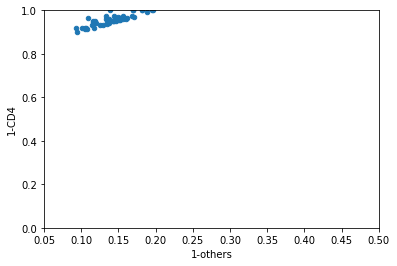

In [18]:
DMCdfdiffcut_linkageGroupINFO['1-'+celltype]=1-DMCdfdiffcut_linkageGroupINFO[celltype]
DMCdfdiffcut_linkageGroupINFO['1-others']=1-DMCdfdiffcut_linkageGroupINFO['others']

#ax=sns.scatterplot(x='1-others',y='1-'+celltype, data=DMCdfdiffcut_linkageGroupINFO) 

DMCdfdiffcut_linkageGroupINFO.plot.scatter(x='1-others',y='1-'+celltype)
plt.xlim([0.05,.5])
plt.ylim([0.0,1])

In [19]:
DMCdfdiffcut_linkageGroupINFO.to_csv(outfile+"_log.txt",sep="\t",index=False)

In [20]:
len(probableDMRcpg)

51

In [21]:
counter=collections.Counter(probableDMRcpg)

In [22]:
print(counter)

Counter({1: 37, 2: 10, 4: 2, 3: 2})


In [23]:
outdf=DMCdfdiffcut.copy()
outdf.drop(['neglogq'],axis=1,inplace=True)
outdf.head()

,chrom,start,end,q,diff,#cpg,p(MWU),p(2dks),CD4,others
1143973,chr19,1072194,1072195,0.30833,-0.821773,1,0.004608,.,0.029500,0.85127
1450623,chr20,6030667,6030668,0.30833,-0.800485,1,0.004608,.,0.028667,0.82915
228568,chr10,6595577,6595578,0.30833,-0.817818,1,0.004608,.,0.000000,0.81782
503995,chr12,6791009,6791010,0.30833,-0.830000,1,0.012782,.,0.000000,0.83000
24900,chr1,11285090,11285091,0.30833,-0.804045,1,0.004608,.,0.007667,0.81171


In [24]:
#outdf.to_csv(outfile,sep="\t",index=False)